In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# **환자추출**

In [2]:
a = np.load("./data/arr_2d.npy")
환자lab = pd.read_csv('/project/data/폐렴환자lab.csv').sort_values(by='SUBJECT_ID')
df = pd.DataFrame(a)
df['환자'] = 환자lab['SUBJECT_ID'].unique()
sub = df[df.iloc[:,:-1].sum(axis=1)>=5]['환자']
sub

0           9
1          21
2          31
3          36
4          37
        ...  
7794    99863
7795    99934
7796    99937
7797    99944
7798    99985
Name: 환자, Length: 6109, dtype: int64

In [3]:
sub1=sub.copy()

# 가공

In [4]:
data = pd.read_csv('./data/환자_Lab_data.csv')

In [5]:
data

,SUBJECT_ID,ITEMID,CHARTTIME,FLAG,EXPIRE_FLAG
0,9,50856,2149-11-09,NaN,1
1,9,50868,2149-11-09,NaN,1
2,9,50879,2149-11-09,NaN,1
3,9,50880,2149-11-09,NaN,1
4,9,50882,2149-11-09,abnormal,1
...,...,...,...,...,...
7408109,99985,51006,2182-03-14,abnormal,0
7408110,99985,51146,2182-03-14,NaN,0
7408111,99985,51200,2182-03-14,NaN,0
7408112,99985,51221,2182-03-14,abnormal,0


# dict 생성 (sub, item, final_date)

In [6]:
dic_sub2idx = {}
for i,j in enumerate(sub.unique()):
    dic_sub2idx[j] = i
dic_sub2idx

{9: 0,
 21: 1,
 31: 2,
 36: 3,
 37: 4,
 41: 5,
 68: 6,
 85: 7,
 94: 8,
 101: 9,
 117: 10,
 124: 11,
 148: 12,
 156: 13,
 157: 14,
 164: 15,
 175: 16,
 177: 17,
 184: 18,
 186: 19,
 188: 20,
 191: 21,
 203: 22,
 208: 23,
 211: 24,
 214: 25,
 221: 26,
 225: 27,
 248: 28,
 252: 29,
 253: 30,
 268: 31,
 269: 32,
 274: 33,
 283: 34,
 290: 35,
 303: 36,
 305: 37,
 308: 38,
 323: 39,
 330: 40,
 346: 41,
 356: 42,
 357: 43,
 360: 44,
 364: 45,
 368: 46,
 391: 47,
 412: 48,
 423: 49,
 425: 50,
 434: 51,
 450: 52,
 452: 53,
 453: 54,
 457: 55,
 482: 56,
 499: 57,
 505: 58,
 507: 59,
 509: 60,
 518: 61,
 530: 62,
 538: 63,
 544: 64,
 546: 65,
 565: 66,
 571: 67,
 576: 68,
 586: 69,
 592: 70,
 596: 71,
 605: 72,
 618: 73,
 627: 74,
 634: 75,
 638: 76,
 654: 77,
 665: 78,
 670: 79,
 674: 80,
 689: 81,
 695: 82,
 698: 83,
 707: 84,
 719: 85,
 720: 86,
 726: 87,
 731: 88,
 738: 89,
 740: 90,
 745: 91,
 784: 92,
 788: 93,
 798: 94,
 801: 95,
 803: 96,
 813: 97,
 818: 98,
 820: 99,
 824: 100,
 827: 101

In [7]:
len(dic_sub2idx)

6109

In [8]:
dic_item2idx = {}
for i,j in enumerate(data['ITEMID'].sort_values().unique()):
    dic_item2idx[j] = i
dic_item2idx

{50800: 0,
 50801: 1,
 50802: 2,
 50803: 3,
 50804: 4,
 50805: 5,
 50806: 6,
 50808: 7,
 50809: 8,
 50810: 9,
 50811: 10,
 50812: 11,
 50813: 12,
 50814: 13,
 50815: 14,
 50816: 15,
 50817: 16,
 50818: 17,
 50819: 18,
 50820: 19,
 50821: 20,
 50822: 21,
 50823: 22,
 50824: 23,
 50825: 24,
 50826: 25,
 50827: 26,
 50828: 27,
 50829: 28,
 50830: 29,
 50831: 30,
 50832: 31,
 50835: 32,
 50836: 33,
 50837: 34,
 50838: 35,
 50839: 36,
 50840: 37,
 50841: 38,
 50842: 39,
 50843: 40,
 50844: 41,
 50845: 42,
 50847: 43,
 50848: 44,
 50849: 45,
 50850: 46,
 50851: 47,
 50852: 48,
 50853: 49,
 50854: 50,
 50855: 51,
 50856: 52,
 50857: 53,
 50858: 54,
 50859: 55,
 50860: 56,
 50861: 57,
 50862: 58,
 50863: 59,
 50864: 60,
 50865: 61,
 50866: 62,
 50867: 63,
 50868: 64,
 50869: 65,
 50870: 66,
 50871: 67,
 50872: 68,
 50873: 69,
 50874: 70,
 50875: 71,
 50876: 72,
 50877: 73,
 50878: 74,
 50879: 75,
 50880: 76,
 50881: 77,
 50882: 78,
 50883: 79,
 50884: 80,
 50885: 81,
 50886: 82,
 50887: 83,
 5

## admission - final

In [9]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

In [10]:
import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

In [11]:
ad = admission[admission['SUBJECT_ID'].isin(sub)]

In [12]:
dic_sub2final_date = dict(ad.groupby('SUBJECT_ID')['DISCHTIME'].max())
dic_sub2final_date

{9: datetime.date(2149, 11, 14),
 21: datetime.date(2135, 2, 8),
 31: datetime.date(2108, 8, 30),
 36: datetime.date(2134, 5, 20),
 37: datetime.date(2183, 8, 26),
 41: datetime.date(2133, 1, 27),
 68: datetime.date(2174, 1, 19),
 85: datetime.date(2167, 7, 30),
 94: datetime.date(2176, 9, 25),
 101: datetime.date(2196, 10, 12),
 117: datetime.date(2133, 12, 1),
 124: datetime.date(2166, 2, 1),
 148: datetime.date(2107, 10, 8),
 156: datetime.date(2121, 1, 27),
 157: datetime.date(2106, 6, 24),
 164: datetime.date(2117, 1, 16),
 175: datetime.date(2184, 1, 31),
 177: datetime.date(2125, 12, 12),
 184: datetime.date(2168, 5, 13),
 186: datetime.date(2176, 10, 1),
 188: datetime.date(2162, 1, 17),
 191: datetime.date(2196, 4, 21),
 203: datetime.date(2160, 5, 7),
 208: datetime.date(2188, 5, 19),
 211: datetime.date(2197, 12, 29),
 214: datetime.date(2188, 11, 4),
 221: datetime.date(2103, 12, 28),
 225: datetime.date(2168, 1, 13),
 248: datetime.date(2142, 11, 6),
 252: datetime.date(21

# interval 1

In [60]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((6109,10,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    if sub in dic_sub2idx.keys():
        subidx = dic_sub2idx[sub]
        itemidx = dic_item2idx[item]
        finaldate = dic_sub2final_date[sub]
        dateidx = -(finaldate - charttime).days + 10
        if (dateidx < 0) or (dateidx > 9) :
            continue    
        if flag == 'abnormal':
            x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
np.save("./data/interval1.npy", x)        
    
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2559457262357076 분
625363.0


In [224]:
in1=np.load("./data/interval1.npy")
in1.sum()

625363.0

In [225]:
in1.shape

(6109, 10, 690)

In [226]:
in1[0,:,:].sum(axis=1)

array([ 0.,  0.,  0.,  0.,  0., 11., 16.,  9.,  8., 17.])

In [227]:
label = pd.DataFrame(data[data['SUBJECT_ID'].isin(sub1)].groupby(['SUBJECT_ID'])['EXPIRE_FLAG'].max()).reset_index(drop=True)

In [228]:
label = np.array(label)
np.save('./data/interval_label.npy',label)

In [229]:
label = np.load('./data/interval_label.npy')

In [230]:
in1.shape, label.shape

((6109, 10, 690), (6109, 1))

In [231]:
len(in1)*0.8

4887.2

In [232]:
i=4887
X_train = in1[:i,:,:]
y_train = label[:i]


X_test = in1[i:,:,:]
y_test = label[i:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4887, 10, 690), (4887, 1), (1222, 10, 690), (1222, 1))

In [233]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [234]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(in1.shape[1], in1.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, in1.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 10, 12)            33744     
_________________________________________________________________
lstm_33 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [235]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 2s 26ms/step - loss: 0.7928 - acc: 0.6664 - val_loss: 0.8857 - val_acc: 0.4804
Epoch 2/200
29/29 [==============================] - 0s 10ms/step - loss: 0.6653 - acc: 0.7091 - val_loss: 0.8073 - val_acc: 0.4804
Epoch 3/200
29/29 [==============================] - 0s 10ms/step - loss: 0.6335 - acc: 0.6953 - val_loss: 0.8061 - val_acc: 0.4853
Epoch 4/200
29/29 [==============================] - 0s 10ms/step - loss: 0.5925 - acc: 0.7180 - val_loss: 0.8149 - val_acc: 0.5221
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5814 - acc: 0.7383 - val_loss: 0.7687 - val_acc: 0.5696
Epoch 6/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5547 - acc: 0.7597 - val_loss: 0.7138 - val_acc: 0.6277
Epoch 7/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5447 - acc: 0.7646 - val_loss: 0.7190 - val_acc: 0.6268
Epoch 8/200
29/29 [==============================] - 0s 10ms/step - loss: 0.539

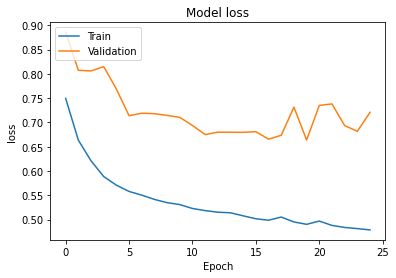

In [236]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

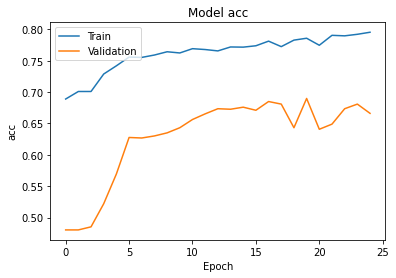

In [237]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [238]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [239]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6399345335515548


# interval 3

In [14]:
len(sub)

6109

In [38]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장

x = np.zeros((6109,10,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    if sub in dic_sub2idx.keys():
        subidx = dic_sub2idx[sub]
        itemidx = dic_item2idx[item]
        finaldate = dic_sub2final_date[sub]
        dateidx = (finaldate - charttime).days
        interval = (finaldate - charttime).days
        
#         print(finaldate,charttime,dateidx,interval)
    
        if (dateidx < 1) or (dateidx > 28) :
            continue    
        if flag == 'abnormal' and interval%3==0:
#             print(sub, dateidx//3, itemidx)
        
            x[subidx, -(dateidx//3), itemidx] = 1
#             print(sub, dateidx//3, itemidx,'ok')
    
IF.close()
        
np.save("./data/interval3.npy", x)        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2753037929534912 분
351248.0


In [154]:
in3 = np.load("./data/interval3.npy")
in3.sum()

351248.0

In [155]:
in3.shape

(6109, 10, 690)

In [156]:
in3[0,:,:].sum(axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 9.])

In [157]:
label = pd.DataFrame(data[data['SUBJECT_ID'].isin(sub1)].groupby(['SUBJECT_ID'])['EXPIRE_FLAG'].max()).reset_index(drop=True)

In [158]:
in3.shape, label.shape

((6109, 10, 690), (6109, 1))

In [159]:
len(in3)*0.8

4887.2

In [160]:
i=4887
X_train = in3[:i,:,:]
y_train = label[:i]


X_test = in3[i:,:,:]
y_test = label[i:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4887, 10, 690), (4887, 1), (1222, 10, 690), (1222, 1))

In [161]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(in3.shape[1], in3.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, in3.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 10, 12)            33744     
_________________________________________________________________
lstm_21 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 2s 26ms/step - loss: 0.7970 - acc: 0.6435 - val_loss: 0.8601 - val_acc: 0.4804
Epoch 2/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6661 - acc: 0.7165 - val_loss: 0.8223 - val_acc: 0.4804
Epoch 3/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6417 - acc: 0.7073 - val_loss: 0.8161 - val_acc: 0.4804
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6269 - acc: 0.6956 - val_loss: 0.8213 - val_acc: 0.4812
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5967 - acc: 0.7129 - val_loss: 0.7947 - val_acc: 0.5000
Epoch 6/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5781 - acc: 0.7242 - val_loss: 0.7681 - val_acc: 0.5295
Epoch 7/200
29/29 [==============================] - 0s 10ms/step - loss: 0.5773 - acc: 0.7206 - val_loss: 0.7631 - val_acc: 0.5450
Epoch 8/200
29/29 [==============================] - 0s 9ms/step - loss: 0.5721 -

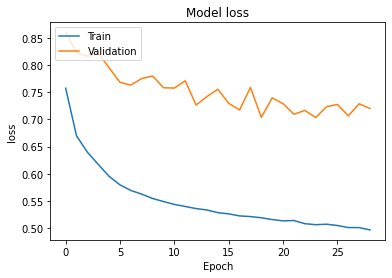

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

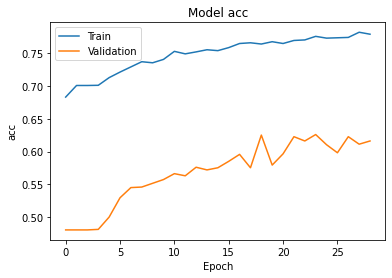

In [164]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [165]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [166]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.6284779050736498


# interval 7

In [54]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장

x = np.zeros((6109,10,690))
x.shape

IF=open("/project/data/폐렴환자lab.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, item, charttime, flag = int(ss[1]), int(ss[3]), datetime.date.fromisoformat(ss[4].split(" ")[0]), ss[5]
    if sub in dic_sub2idx.keys():
        subidx = dic_sub2idx[sub]
        itemidx = dic_item2idx[item]
        finaldate = dic_sub2final_date[sub]
        dateidx = (finaldate - charttime).days
        interval = (finaldate - charttime).days
        
#         print(finaldate,charttime,dateidx,interval)
    
        if (dateidx < 1) or (dateidx > 64) :
            continue    
        if flag == 'abnormal' and interval%7==0:
#             print(sub, dateidx//3, itemidx)
        
            x[subidx, -(dateidx//7), itemidx] = 1
#             print(sub, dateidx//3, itemidx,'ok')
    
IF.close()
        
np.save("./data/interval7.npy", x)        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.27272135416666665 분
169349.0


In [240]:
in7 = np.load("./data/interval7.npy")
in7.sum()

169349.0

In [241]:
in7.shape

(6109, 10, 690)

In [242]:
in7.sum()

169349.0

In [243]:
in7[0,:,:].sum(axis=1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [244]:
i=4887
X_train = in7[:i,:,:]
y_train = label[:i]


X_test = in7[i:,:,:]
y_test = label[i:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4887, 10, 690), (4887, 1), (1222, 10, 690), (1222, 1))

In [245]:
from keras.regularizers import l2
lstm = Sequential()
lstm.add(LSTM(units=12, activation='tanh', input_shape=(in7.shape[1], in7.shape[2]),return_sequences=True,
         bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, in7.shape[2]),
              bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 10, 12)            33744     
_________________________________________________________________
lstm_35 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 13        
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
None


In [246]:
from keras.callbacks import EarlyStopping

lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200, callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 2s 26ms/step - loss: 0.8122 - acc: 0.6533 - val_loss: 0.8033 - val_acc: 0.4804
Epoch 2/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6989 - acc: 0.6910 - val_loss: 0.8543 - val_acc: 0.4804
Epoch 3/200
29/29 [==============================] - 0s 10ms/step - loss: 0.6519 - acc: 0.7107 - val_loss: 0.8153 - val_acc: 0.4804
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6438 - acc: 0.7026 - val_loss: 0.8126 - val_acc: 0.4804
Epoch 5/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6363 - acc: 0.6955 - val_loss: 0.8089 - val_acc: 0.4804
Epoch 6/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6126 - acc: 0.7120 - val_loss: 0.7870 - val_acc: 0.4812
Epoch 7/200
29/29 [==============================] - 0s 9ms/step - loss: 0.6100 - acc: 0.7025 - val_loss: 0.8036 - val_acc: 0.4820
Epoch 8/200
29/29 [==============================] - 0s 10ms/step - loss: 0.6034 

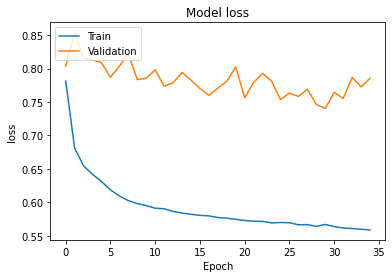

In [247]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

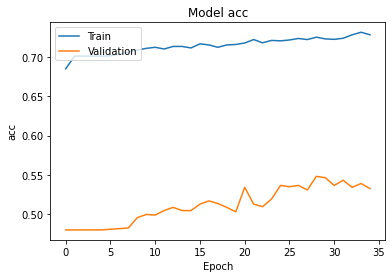

In [248]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [249]:
pred = lstm.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [250]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.5237315875613748


In [125]:
in1.sum(),in3.sum(),in7.sum()

(625363.0, 351248.0, 169349.0)